In [3]:
#Things to import
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time, tqdm, json, re, requests, os, csv
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import snscrape.modules.twitter as sntwitter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
#21/05/2020 -> 05/02/2021
#21 Maj - 5 Feb
query = "(#stopthesteal) lang:en until:2021-02-06 since:2020-05-21"
#test_query = "(#stopthesteal) lang:en until:2021-01-07 since:2021-01-05"
tweets = []

In [5]:
def log(tweet, logfile,output_path=os.getcwd()):
    """Logging function to create a log of the scraping status"""
    #Open or create the csv log file
    if os.path.isfile(logfile):
        log = open(logfile,'a')
    else:
        log = open(logfile, 'w')
        header = ['timestamp', 'status_code', 'length', 'output_file']
        log.write(';'.join(header) + '\n')
    
    #Get log information
    #If the tweet did not fail, the status code is 200
    status_code = 200
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))
    #Should be 27 values along with the tweet
    length = len(tweet)
    
    #append to log file
    with open(logfile, 'a') as log:
        log.write(f'{timestamp};{status_code};{length};{output_path}' + "\n")
        

In [6]:
#Getting the tweets:
logfile = 'tweet_scrape_log.csv'
for tweet in tqdm.tqdm(sntwitter.TwitterSearchScraper(query).get_items()):
    try:
        tweets.append([tweet.date, tweet.content])
    except Exception as e:
        print('Something went wrong')
        print(e)
        print(f'Last tweet: {tweet.date} {tweet.content}')
        with open('tweets_backup.csv', 'w', encoding='utf8') as f:
            write = csv.writer(f)
            write.writerow(['datetime', 'text'])
            write.writerows(tweets)
        continue
    log(vars(tweet), logfile)

10087it [06:49, 24.60it/s]


KeyboardInterrupt: 

In [7]:
#If everything went to plan, save the list as a csv
with open('tweets.csv', 'w', encoding='utf8') as f:
    write = csv.writer(f)
    write.writerow(['datetime', 'text'])
    write.writerows(tweets)

In [8]:
#Get dataframe from csv
df_tweets = pd.read_csv('tweets.csv')
df_tweets['datetime'] = pd.to_datetime(df_tweets['datetime'])

In [32]:
#Creating our Dataframe from list (only if everyhting went wrong)
#df_tweets = pd.DataFrame(tweets, columns=['datetime', 'text'])

In [9]:
df_tweets

,datetime,text
0,2021-02-05 23:41:02+00:00,PREDICTION: Every @FoxNews primetime host toni...
1,2021-02-05 23:35:30+00:00,I don't understand - since we all KNOW the ele...
2,2021-02-05 23:29:42+00:00,@SethMacFarlane Trump2020 #StopTheSteal #Abso...
3,2021-02-05 23:06:12+00:00,@DonaldJTrumpJr thank you for keeping the grea...
4,2021-02-05 22:57:47+00:00,@BWWings I just found out that someone stole a...
...,...,...
10082,2021-01-08 05:02:24+00:00,@TheRISEofROD @ShawnG927 EO 13848!\r\nFuck'em ...
10083,2021-01-08 04:59:31+00:00,@nbcwashington If American Airlines wants to i...
10084,2021-01-08 04:58:25+00:00,These people need to be held accountable. This...
10085,2021-01-08 04:58:05+00:00,...sooooo was that the Q storm oooorrrr is tha...


In [10]:
#Working with the tweet text data
dirty_text = df_tweets['text'].copy()

In [11]:
def clean(array_of_tweets):
    """This function will take a list of tweets and clean them in the following manner:
    Make lowercase, Replace mentions with @user, and remove any links"""
    for i in range(len(array_of_tweets)):
        #make lower() and strip
        new_text = array_of_tweets[i].lower().strip()
        #replace @user 
        new_text = re.sub(r'\@\w+', '', new_text)
        #remove links
        new_text = re.sub(r'https?://\w+\.\w+/?\w+', '', new_text)
        #remove (video)
        new_text = re.sub(r'\(video\)', '', new_text)
        #remove \r and \n
        new_text = re.sub(r'\r', '', new_text)
        new_text = re.sub(r'\n', '', new_text)
        #remove hashtags
        new_text = re.sub(r'#\w+', '', new_text)
        #remove punctuation 
        new_text = re.sub(r'\.', '', new_text)
        array_of_tweets[i] = new_text
    return array_of_tweets

In [12]:
#Get clean_text
clean_text = clean(dirty_text)

In [13]:
#testing the text
for i in range(5):
    print(df_tweets['text'][i])
    print()
    print(clean_text[i])
    print()

PREDICTION: Every @FoxNews primetime host tonight will bemoan "cancel culture" and "the elites" - while NO attention will be paid to @LouDobbs role in the #StopTheSteal hoax. https://t.co/TdJXMXxZW2

prediction: every  primetime host tonight will bemoan "cancel culture" and "the elites" - while no attention will be paid to  role in the  hoax 

I don't understand - since we all KNOW the election was stolen, why don't they just defend him in court?

🤣🤣🤣🤣

#StopTheSteal https://t.co/fFYrQBRLF7

i don't understand - since we all know the election was stolen, why don't they just defend him in court?🤣🤣🤣🤣 

@SethMacFarlane Trump2020 #StopTheSteal  #AbsoluteEvidence

 trump2020   

@DonaldJTrumpJr thank you for keeping the greatest president we have ever had active on social media #MAGA! 

#stopTheSteal

 thank you for keeping the greatest president we have ever had active on social media ! 

@BWWings I just found out that someone stole a bunch of my reward points... how do I get them back? #s

In [15]:
#Making a column with the cleaned text
df_tweets['cleaned text'] = clean_text

In [16]:
df_tweets

,datetime,text,cleaned text
0,2021-02-05 23:41:02+00:00,PREDICTION: Every @FoxNews primetime host toni...,prediction: every primetime host tonight will...
1,2021-02-05 23:35:30+00:00,I don't understand - since we all KNOW the ele...,i don't understand - since we all know the ele...
2,2021-02-05 23:29:42+00:00,@SethMacFarlane Trump2020 #StopTheSteal #Abso...,trump2020
3,2021-02-05 23:06:12+00:00,@DonaldJTrumpJr thank you for keeping the grea...,thank you for keeping the greatest president ...
4,2021-02-05 22:57:47+00:00,@BWWings I just found out that someone stole a...,i just found out that someone stole a bunch o...
...,...,...,...
10082,2021-01-08 05:02:24+00:00,@TheRISEofROD @ShawnG927 EO 13848!\r\nFuck'em ...,eo 13848!fuck'em in the neck!
10083,2021-01-08 04:59:31+00:00,@nbcwashington If American Airlines wants to i...,if american airlines wants to induce good beh...
10084,2021-01-08 04:58:25+00:00,These people need to be held accountable. This...,these people need to be held accountable this ...
10085,2021-01-08 04:58:05+00:00,...sooooo was that the Q storm oooorrrr is tha...,sooooo was that the q storm oooorrrr is that l...


In [17]:
#Using Vader to find perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()
sentiment = []
for i in tqdm.tqdm(df_tweets['cleaned text'].values):
    score = analyzer.polarity_scores(i)['compound']
    sentiment.append(score)

100%|██████████████████████████████████████████████████████████████████████████| 10087/10087 [00:02<00:00, 4999.12it/s]


In [18]:
df_tweets['sentiment_score'] = sentiment

In [19]:
for i in range(10):
    print(df_tweets['cleaned text'][i], df_tweets['sentiment_score'][i])
    print()

prediction: every  primetime host tonight will bemoan "cancel culture" and "the elites" - while no attention will be paid to  role in the  hoax  -0.6486

i don't understand - since we all know the election was stolen, why don't they just defend him in court?🤣🤣🤣🤣  -0.4939

 trump2020    0.0

 thank you for keeping the greatest president we have ever had active on social media !  0.8655

 i just found out that someone stole a bunch of my reward points how do i get them back?  0.5719

hmmm,  at work  america needs to do its research when the next electron rolls around     0.0

 talking about it!!  0.0

 i mean, i would rather read about someone’s struggles overcoming adversity and the life experiences from that than i promoted  as a career move poor    -0.6808

 irony is that  was penalised for questioning authority, but within 30 second of sutton death finishing his authority was questioned minus points for  and  the only alternative  -0.7684

the internet is telling me that mike lindell

In [20]:
df_tweets

,datetime,text,cleaned text,sentiment_score
0,2021-02-05 23:41:02+00:00,PREDICTION: Every @FoxNews primetime host toni...,prediction: every primetime host tonight will...,-0.6486
1,2021-02-05 23:35:30+00:00,I don't understand - since we all KNOW the ele...,i don't understand - since we all know the ele...,-0.4939
2,2021-02-05 23:29:42+00:00,@SethMacFarlane Trump2020 #StopTheSteal #Abso...,trump2020,0.0000
3,2021-02-05 23:06:12+00:00,@DonaldJTrumpJr thank you for keeping the grea...,thank you for keeping the greatest president ...,0.8655
4,2021-02-05 22:57:47+00:00,@BWWings I just found out that someone stole a...,i just found out that someone stole a bunch o...,0.5719
...,...,...,...,...
10082,2021-01-08 05:02:24+00:00,@TheRISEofROD @ShawnG927 EO 13848!\r\nFuck'em ...,eo 13848!fuck'em in the neck!,0.0000
10083,2021-01-08 04:59:31+00:00,@nbcwashington If American Airlines wants to i...,if american airlines wants to induce good beh...,0.4404
10084,2021-01-08 04:58:25+00:00,These people need to be held accountable. This...,these people need to be held accountable this ...,-0.0258
10085,2021-01-08 04:58:05+00:00,...sooooo was that the Q storm oooorrrr is tha...,sooooo was that the q storm oooorrrr is that l...,0.3612


In [21]:
#calculating the average of all sentiment
total = 0
for i in df_tweets['sentiment_score']:
    total += i
avg = total / len(df_tweets['sentiment_score'])

In [22]:
avg

-0.07191631803311181

In [23]:
#Creating date column with the date 
df_tweets['date'] = df_tweets['datetime'].dt.date

In [24]:
df_tweets.head(3)

,datetime,text,cleaned text,sentiment_score,date
0,2021-02-05 23:41:02+00:00,PREDICTION: Every @FoxNews primetime host toni...,prediction: every primetime host tonight will...,-0.6486,2021-02-05
1,2021-02-05 23:35:30+00:00,I don't understand - since we all KNOW the ele...,i don't understand - since we all know the ele...,-0.4939,2021-02-05
2,2021-02-05 23:29:42+00:00,@SethMacFarlane Trump2020 #StopTheSteal #Abso...,trump2020,0.0000,2021-02-05


In [25]:
#Splitting the dataframe by date, getting the sum and count of the sentiment to calculate average
tweets_by_date = df_tweets.groupby('date')['sentiment_score'].agg(['sum', 'count'])

In [26]:
#Creating an average column
tweets_by_date['avg'] = tweets_by_date['sum'] / tweets_by_date['count']

In [27]:
#Drop sum and rename count
tweets_by_date.drop('sum', axis=1, inplace=True)
tweets_by_date.columns = ['tweet_count', 'total_avg']

In [28]:
#Getting all the positive values
positive_sentiment = df_tweets[df_tweets['sentiment_score'] > 0].groupby('date')['sentiment_score'].agg(['sum', 'count'])
#Getting the positive average
positive_sentiment['positive_avg'] = positive_sentiment['sum'] / positive_sentiment['count']
print(positive_sentiment)

#Getting all the negative values
negative_sentiment = df_tweets[df_tweets['sentiment_score'] < 0].groupby('date')['sentiment_score'].agg(['sum', 'count']) 
#Getting negative average
negative_sentiment['negative_avg'] = negative_sentiment['sum'] / negative_sentiment['count']
print(negative_sentiment)

                 sum  count  positive_avg
date                                     
2021-01-08  139.5169    296      0.471341
2021-01-09  148.0813    305      0.485512
2021-01-10   93.5963    202      0.463348
2021-01-11  119.1723    231      0.515897
2021-01-12  162.3869    318      0.510651
2021-01-13  112.3750    235      0.478191
2021-01-14  110.9471    232      0.478220
2021-01-15   97.0222    183      0.530176
2021-01-16   48.7366    107      0.455482
2021-01-17   42.4946     86      0.494123
2021-01-18   42.1628     89      0.473739
2021-01-19   41.0703     76      0.540399
2021-01-20   56.3787    125      0.451030
2021-01-21   28.7214     56      0.512882
2021-01-22   28.4019     55      0.516398
2021-01-23   25.6185     58      0.441698
2021-01-24   29.5125     63      0.468452
2021-01-25   33.0913     68      0.486637
2021-01-26   24.1876     49      0.493624
2021-01-27   22.3854     39      0.573985
2021-01-28   36.7396     78      0.471021
2021-01-29   27.9390     62      0

In [29]:
#Dropping sum
positive_sentiment.drop('sum', axis=1, inplace=True)
negative_sentiment.drop('sum', axis=1, inplace=True)
# Renaming the columns
positive_sentiment.columns = ['positive_count', 'positive_avg']
negative_sentiment.columns = ['negative_count', 'negative_avg']

In [30]:
#Adding the positive and the negative to combined_tweets
all_sentiment = positive_sentiment.join(negative_sentiment, how='inner')
df_combined_tweets = tweets_by_date.join(all_sentiment, how='inner')
#Add day column for plots
df_combined_tweets['day'] = df_combined_tweets.index

In [31]:
df_combined_tweets

,tweet_count,total_avg,positive_count,positive_avg,negative_count,negative_avg,day
date,,,,,,,
2021-01-08,816,-0.058430,296,0.471341,351,-0.533321,2021-01-08
2021-01-09,855,-0.055365,305,0.485512,370,-0.528158,2021-01-09
2021-01-10,598,-0.129875,202,0.463348,297,-0.576639,2021-01-10
2021-01-11,691,-0.042697,231,0.515897,299,-0.497245,2021-01-11
2021-01-12,916,-0.055817,318,0.510651,394,-0.541918,2021-01-12
2021-01-13,712,-0.099969,235,0.478191,337,-0.544667,2021-01-13
2021-01-14,745,-0.058348,232,0.478220,296,-0.521677,2021-01-14
2021-01-15,568,-0.054584,183,0.530176,237,-0.540193,2021-01-15
2021-01-16,359,-0.119093,107,0.455482,168,-0.544589,2021-01-16


In [32]:
df_combined_tweets.to_csv('combined_tweets.csv', encoding='utf8')

<AxesSubplot:xlabel='date', ylabel='total_avg'>

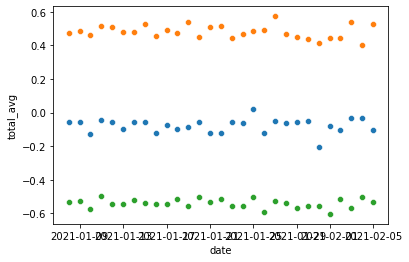

In [33]:
#Scatterplot over the average
f, ax = plt.subplots()
sns.scatterplot(x='date', y='total_avg', data=df_combined_tweets, ax=ax)
sns.scatterplot(x='date', y='positive_avg', data=df_combined_tweets, ax=ax)
sns.scatterplot(x='date', y='negative_avg', data=df_combined_tweets, ax=ax)

<AxesSubplot:xlabel='datetime', ylabel='sentiment_score'>

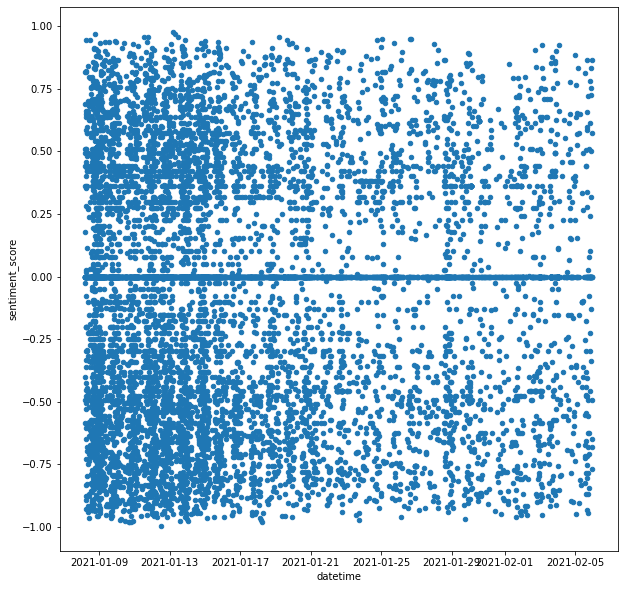

In [34]:
df_tweets.plot(x='datetime', y='sentiment_score', kind='scatter', figsize=(10,10))

In [274]:
#Show all in a scatter plot -> motivate where we go
#Average sentiment of all tweets over time
#Average sentiment of negative tweets over time (as well)
#Make curve for positive and negative

#Bag of words -> look at what words are the most negative/positive
# Word cloud 

#Polarization

#Overvejelser:
# Lexicon limitations -> words that have an absolute value